In [13]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import sem
import numpy as np


## suj: participant
## ses: ("session"): training = 1 / main = 2
## block: larger blocks (1 -- 10)
## miniblock: smaller blocks of 20 trials (1 -- 30)
## respside: (1/2) withinn participant counterbalancing of response side
## rule: -2, 0 (simple comparison), +2
## stim: stimulus (2, 4, 6, 8)
## acc: accuracy (0: error / 1: correct)
## rt: response times (ms --- values of 0 are probably anticipations)
## cg: congruency (1: congruent / -1 incongruent); is the result of the application of the rule one the same side of 5 as the stimulus itself? meaningful only for rule !=0
## target: result of the application of the rule to the stimulus
## code: ?
## begend: ?
## newCode: ? 

result = pyreadr.read_r('exp1.R')['data']
training = result.loc[result['ses'] == 1] # data from training session (not mentionned in paper?)
main = result.loc[result['ses'] == 2] # data from main session

print(len(np.unique(result['suj'])), "participants in all data:", np.unique(result['suj']))
print(len(np.unique(training['suj'])), "participants in \"training\" session:", np.unique(training['suj']))
print(len(np.unique(main['suj'])), "participants in \"main\" session:", np.unique(main['suj']))

print('\n')

# find excluded participant
sujs = np.unique(result['suj'].tolist())
for s in sujs:
    results_s = result.loc[result['suj'] == s]
    error_rate_s = 100-100*np.mean(results_s['acc'].tolist())
    point = "---> " if error_rate_s>15 else ""
    print(point+"participant", s, "has an error rate of", round(error_rate_s, 3), "%")

print('\n')
result = result.loc[result['suj'] != 6] # remove subject 6 because error rate more than 15%
print(len(np.unique(result['suj'])), "participants in all data after exclusion:", np.unique(result['suj']))



19 participants in all data: [ 2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
1 participants in "training" session: [5]
18 participants in "main" session: [ 2  3  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


participant 2 has an error rate of 9.5 %
participant 3 has an error rate of 7.167 %
participant 5 has an error rate of 5.833 %
---> participant 6 has an error rate of 19.833 %
participant 7 has an error rate of 5.167 %
participant 8 has an error rate of 3.667 %
participant 9 has an error rate of 2.833 %
participant 10 has an error rate of 13.167 %
participant 11 has an error rate of 9.167 %
participant 12 has an error rate of 2.833 %
participant 13 has an error rate of 2.5 %
participant 14 has an error rate of 8.167 %
participant 15 has an error rate of 3.5 %
participant 16 has an error rate of 11.5 %
participant 17 has an error rate of 7.0 %
participant 18 has an error rate of 3.833 %
participant 19 has an error rate of 9.833 %
participant 20 has an error rate of 5.

In [14]:
stimuli = np.array([2,4,6,8])
simple = result.loc[result['rule'] == 0]
chained = result.loc[result['rule'] != 0]
add = result.loc[result['rule'] == 2]
sub = result.loc[result['rule'] == -2]
congruent = result.loc[(result['cg'] == 1) & (result['rule'] != 0)]
incongruent = result.loc[(result['cg'] == -1) & (result['rule'] != 0)]

print(round(100 - 100*np.mean(chained['acc']),1) - round(100 - 100*np.mean(simple['acc']),1), "points difference between simple and chained (should be 4.3)")
print(np.median(chained.loc[chained['acc']==1]['rt']) - np.median(simple.loc[simple['acc']==1]['rt']), "ms difference between simple and chained (should be 85)")
print(round(100 - 100*np.mean(incongruent['acc']),1) - round(100 - 100*np.mean(congruent['acc']),1), "points difference between congruent and incongruent (should be 4.4)")
print(np.median(incongruent.loc[incongruent['acc']==1]['rt']) - np.median(congruent.loc[congruent['acc']==1]['rt']), "ms difference between congruent and incongruent (should be 23)")

print('\n')
print('accuracy of anticipated trials:', result.loc[result['rt']==0]['acc'].to_list())

4.300000000000001 points difference between simple and chained (should be 4.3)
85.0 ms difference between simple and chained (should be 85)
4.4 points difference between congruent and incongruent (should be 4.4)
20.0 ms difference between congruent and incongruent (should be 23)


accuracy of anticipated trials: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Simple blocks

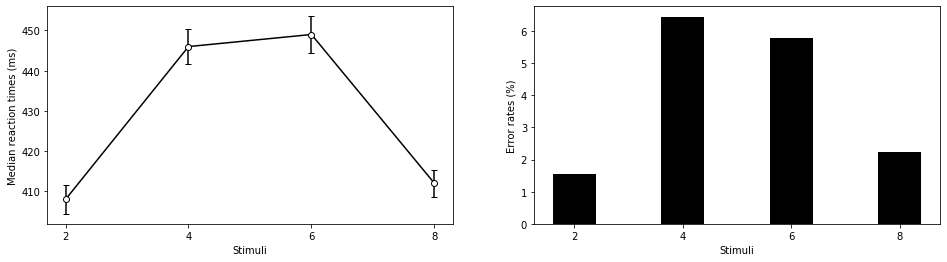

In [3]:
data_simple = [simple.loc[simple['stim'] == s] for s in stimuli]
error_rates_simple = [100 - 100*np.mean(s['acc']) for s in data_simple]
data_simple_correct = [s.loc[s['acc'] == 1] for s in data_simple]
RTs_simple = np.array([s['rt'] for s in data_simple_correct])
    
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.errorbar(stimuli, [np.median(s) for s in RTs_simple], [sem(s) for s in RTs_simple], color='black', capsize=3, fmt="o", markerfacecolor="white", linestyle='-')
plt.xticks(stimuli)
plt.xlabel('Stimuli')
plt.ylabel('Median reaction times (ms)')
# plt.legend()

plt.subplot(1,2,2)
plt.bar(stimuli, error_rates_simple, color='black')
plt.xticks(stimuli)
plt.xlabel('Stimuli')
plt.ylabel('Error rates (%)')
# plt.legend()
plt.show()



    

# Chained blocks

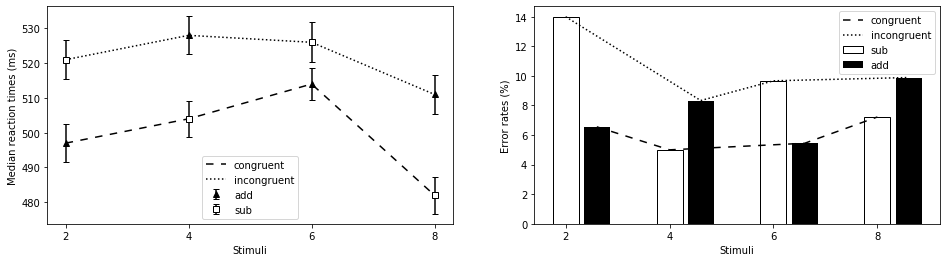

In [4]:
data_add = [add.loc[add['stim'] == s] for s in stimuli]
data_sub = [sub.loc[sub['stim'] == s] for s in stimuli]
error_rates_add = [100 - 100*np.mean(s['acc']) for s in data_add]
error_rates_sub = [100 - 100*np.mean(s['acc']) for s in data_sub]

data_add_correct = [s.loc[s['acc'] == 1] for s in data_add]
data_sub_correct = [s.loc[s['acc'] == 1] for s in data_sub]
RTs_add = np.array([s['rt'] for s in data_add_correct])
RTs_sub = np.array([s['rt'] for s in data_sub_correct])

data_congruent = [congruent.loc[congruent['stim'] == s] for s in stimuli]
data_incongruent = [incongruent.loc[incongruent['stim'] == s] for s in stimuli]
error_rates_congruent = [100 - 100*np.mean(s['acc']) for s in data_congruent]
error_rates_incongruent = [100 - 100*np.mean(s['acc']) for s in data_incongruent]

data_congruent_correct = [s.loc[s['acc'] == 1] for s in data_congruent]
data_incongruent_correct = [s.loc[s['acc'] == 1] for s in data_incongruent]
RTs_congruent = np.array([s['rt'] for s in data_congruent_correct])
RTs_incongruent = np.array([s['rt'] for s in data_incongruent_correct])

    

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.errorbar(stimuli, [np.median(s) for s in RTs_add], [sem(s) for s in RTs_add], color='black', ls='none', capsize=3, fmt='^', label='add')
plt.errorbar(stimuli, [np.median(s) for s in RTs_sub], [sem(s) for s in RTs_sub], color='black', ls='none', capsize=3, fmt='s', label='sub', markerfacecolor='white')

plt.plot(stimuli, [np.median(s) for s in RTs_congruent], linestyle=(0, (5, 5)), color='black', label='congruent')
plt.plot(stimuli, [np.median(s) for s in RTs_incongruent], linestyle='dotted', color='black', label='incongruent')

plt.xticks(stimuli)
plt.xlabel('Stimuli')
plt.ylabel('Median reaction times (ms)')
plt.legend()

plt.subplot(1,2,2)
bar_width = .5
bar_x_offset = bar_width + .1
plt.bar(stimuli, error_rates_sub, width=bar_width, label='sub', color='white', edgecolor='black')
plt.bar(stimuli+bar_x_offset, error_rates_add, width=bar_width, label='add', color='black')

congruent_x_offset = [bar_x_offset if s in [2,6] else 0 for s in stimuli]
incongruent_x_offset = [bar_x_offset if s not in [2,6] else 0 for s in stimuli]
plt.plot(stimuli + congruent_x_offset, error_rates_congruent, linestyle=(0, (5, 5)), color='black', label='congruent')
plt.plot(stimuli + incongruent_x_offset, error_rates_incongruent, linestyle='dotted', color='black', label='incongruent')

plt.xticks(stimuli)
plt.xlabel('Stimuli')
plt.ylabel('Error rates (%)')
plt.legend()
plt.show()



    

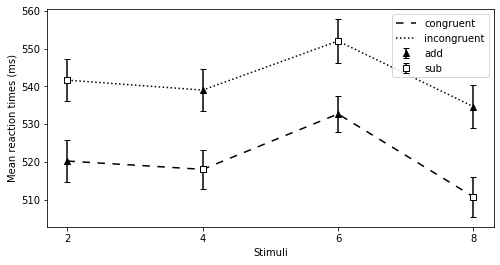

In [5]:
plt.figure(figsize=(8,4))

plt.subplot(1,1,1)
plt.errorbar(stimuli, [np.mean(s) for s in RTs_add], [sem(s) for s in RTs_add], color='black', ls='none', capsize=3, fmt='^', label='add')
plt.errorbar(stimuli, [np.mean(s) for s in RTs_sub], [sem(s) for s in RTs_sub], color='black', ls='none', capsize=3, fmt='s', label='sub', markerfacecolor='white')

plt.plot(stimuli, [np.mean(s) for s in RTs_congruent], linestyle=(0, (5, 5)), color='black', label='congruent')
plt.plot(stimuli, [np.mean(s) for s in RTs_incongruent], linestyle='dotted', color='black', label='incongruent')

plt.xticks(stimuli)
plt.xlabel('Stimuli')
plt.ylabel('Mean reaction times (ms)')
plt.legend()
plt.show()

    

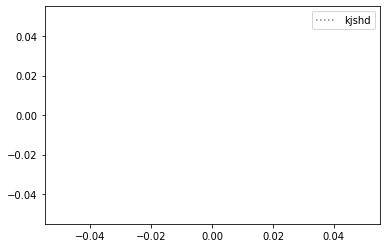

In [6]:
plt.plot([0],linestyle='dotted', color='gray', label='kjshd')
plt.legend()
plt.show()